In [37]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

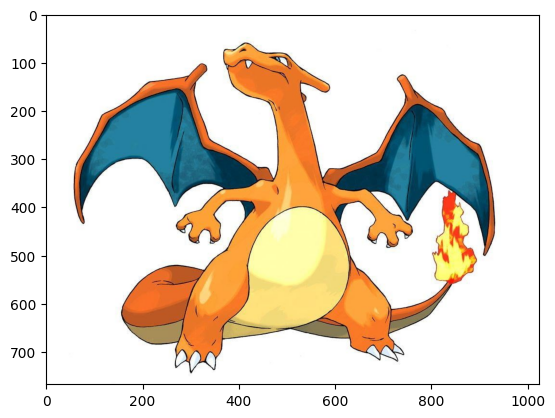

In [38]:
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
# plt.axis("off")
plt.show()

In [57]:
image.shape

(768, 1024, 3)

In [159]:
x = 100
y = 100
sx = 1.5
sy = 1.5
angle = 45
height, width, channels = image.shape

## Translation 

In [197]:
translate_x = np.float32(
   [ [1, 0, x],
	[0, 1, 0]]
)

translate_y = np.float32(
    [[1, 0, 0],
	[0, 1, y]]
)

translate = np.float32(
    [[1, 0, x],
	[0, 1, y]]
)

def translating_image(image, x, y):
    translate = np.float32(
    [[1, 0, x],
	[0, 1, y]]
    )
    return cv2.warpAffine(image, translate, (width, height))

image_translate_x = translating_image(image, 100, 0)
image_translate_y = translating_image(image, 0, 100)
image_translate = translating_image(image, 100, 100)


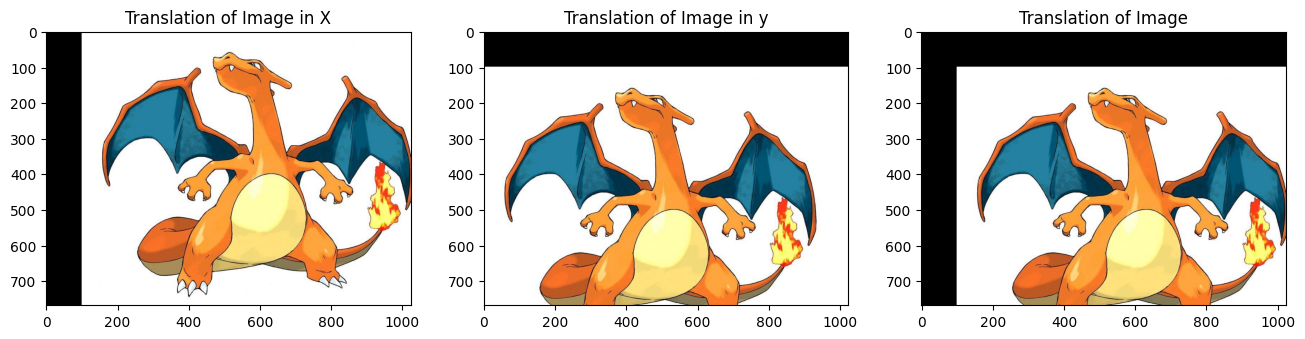

In [198]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.title("Translation of Image in X")
plt.imshow(image_translate_x)
# plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Translation of Image in y")
plt.imshow(image_translate_y)
# plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Translation of Image")
plt.imshow(image_translate)
# plt.axis("off")

plt.show()

## Reflection

In [202]:
reflect_x = np.float32([[1,  0, 0],
                      [0, -1, height],
                      [0,  0, 1]])
reflect_y = np.float32([[-1,  0, width],
                      [0, 1, 0],
                      [0,  0, 1]])
reflect = np.float32([[-1,  0, width],
                      [0, -1, height],
                      [0,  0, 1]])

reflected_img_x = cv2.warpPerspective(image, reflect_x, (width, height))
reflected_img_y = cv2.warpPerspective(image, reflect_y, (width, height))
reflected_img = cv2.warpPerspective(image, reflect, (width, height))

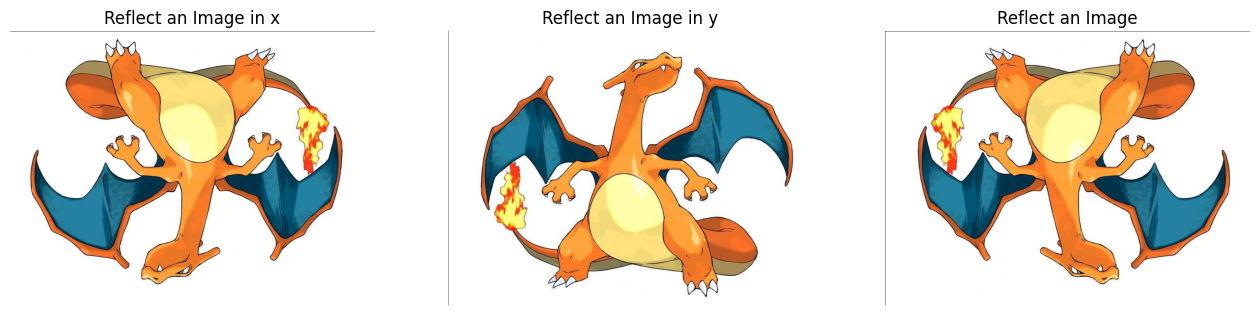

In [203]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.title("Reflect an Image in x")
plt.imshow(reflected_img_x)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Reflect an Image in y")
plt.imshow(reflected_img_y)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reflect an Image")
plt.imshow(reflected_img)
plt.axis("off")

plt.show()

## Anticlockwise matrix

M =
\begin{bmatrix}
\cos\theta & -\sin\theta & (1 - \cos\theta) \cdot cx + \sin\theta \cdot cy \\
\sin\theta & \cos\theta & (1 - \cos\theta) \cdot cy - \sin\theta \cdot cx
\end{bmatrix}


In [206]:
def rotate_matrix(width, height, angle, scale):
    cx, cy = width, height
    theta = np.radians(angle)
    M = np.float32([[scale * np.cos(theta),  scale * (-np.sin(theta)), (1 - scale * np.cos(theta)) * cx + scale * np.sin(theta) * cy],
               [scale * np.sin(theta), scale * np.cos(theta), (1 - scale * np.cos(theta)) * cy - scale * np.sin(theta) * cx]])
    return M

def rotating_matrix(image, angle):
    return cv2.warpAffine(image, rotate_matrix(width/2, height/2, angle, 0.6), (width, height))

img_rotation_30 = rotating_matrix(image, 30)
img_rotation_60 = rotating_matrix(image, 60)
img_rotation_90 = rotating_matrix(image, 90)

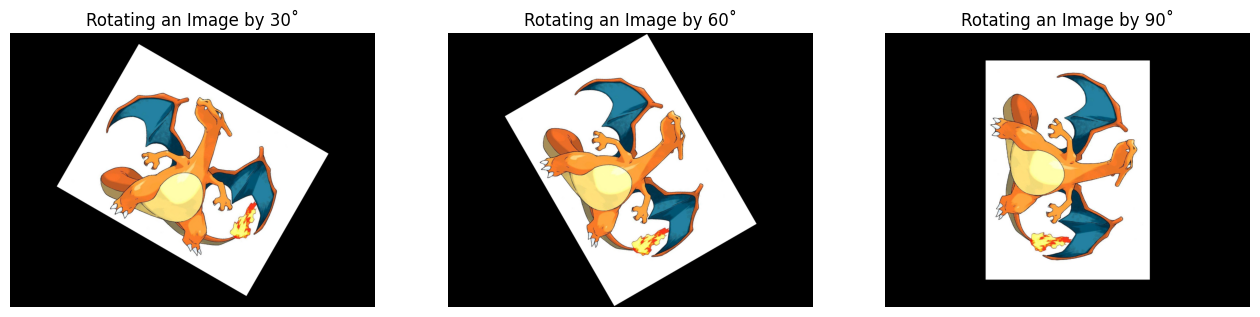

In [207]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.imshow(img_rotation_30)
plt.title("Rotating an Image by 30˚")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_rotation_60)
plt.title("Rotating an Image by 60˚")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_rotation_90)
plt.title("Rotating an Image by 90˚")
plt.axis("off")

plt.show()

In [166]:

img_rotation_30_clock = cv2.warpAffine(image, rotate_matrix(width/2, height/2, -30, 0.6), (width, height))
img_rotation_60_clock = cv2.warpAffine(image, rotate_matrix(width/2, height/2, -60, 0.6), (width, height))
img_rotation_90_clock = cv2.warpAffine(image, rotate_matrix(width/2, height/2, -90, 0.6), (width, height))

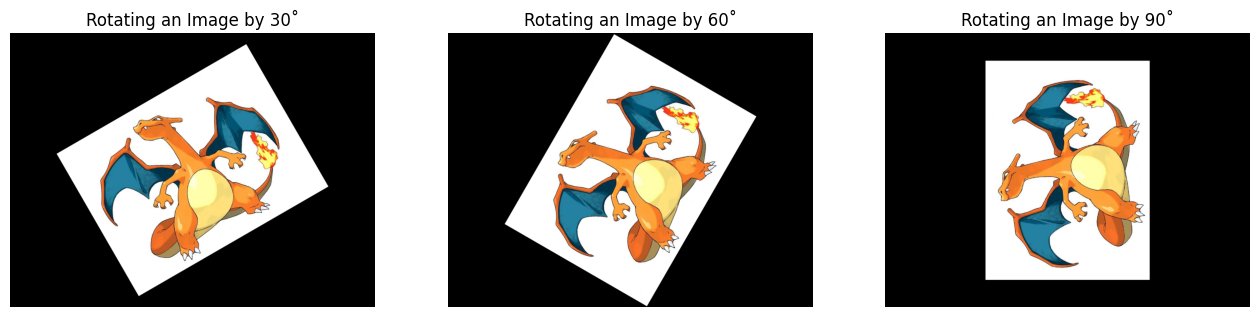

In [167]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.imshow(img_rotation_30_clock)
plt.title("Rotating an Image by 30˚")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_rotation_60_clock)
plt.title("Rotating an Image by 60˚")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_rotation_90_clock)
plt.title("Rotating an Image by 90˚")
plt.axis("off")

plt.show()

In [192]:
def scaling(image, sx, sy):
    matrix = np.float32(
    [[sx, 0, 0],
     [0, sy, 0]]
    )
    return cv2.warpAffine(image, matrix, (int(width * sx), int(height * sy)))

image_scale_x = scaling(image, 2, 1)
image_scale_y = scaling(image, 1, 2)
image_scale = scaling(image, 1.5, 1.5)

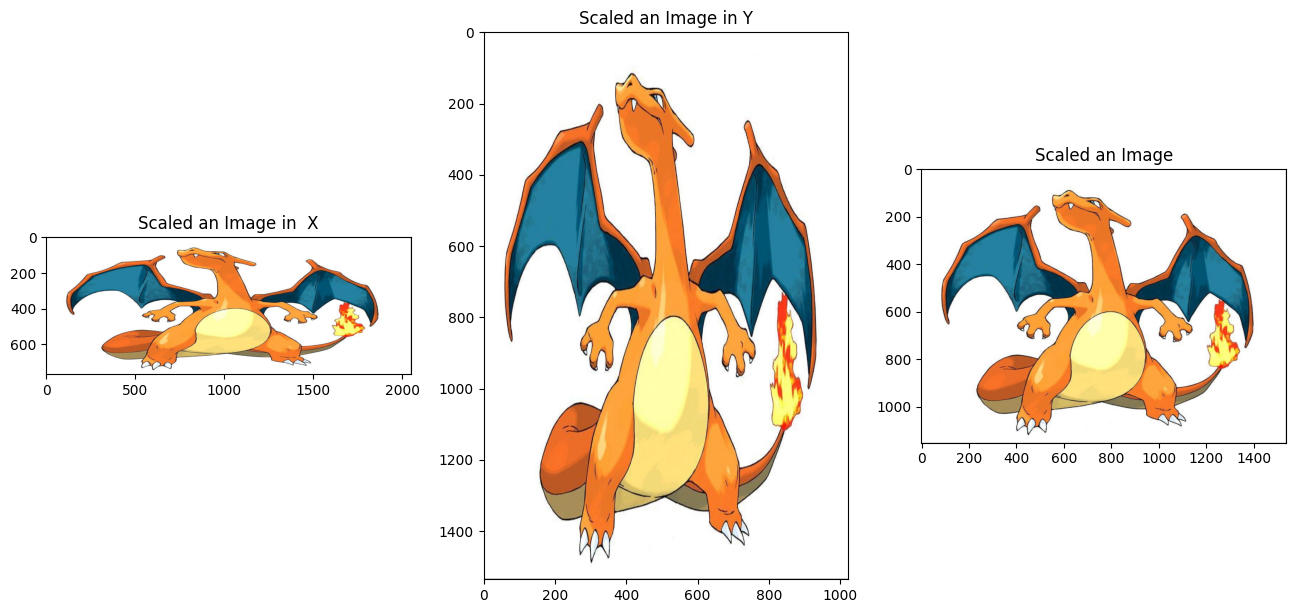

In [193]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.imshow(image_scale_x)
plt.title("Scaled an Image in  X")

plt.subplot(1, 3, 2)
plt.imshow(image_scale_y)
plt.title("Scaled an Image in Y")

plt.subplot(1, 3, 3)
plt.imshow(image_scale)
plt.title("Scaled an Image")

plt.show()

In [194]:
def shearing(image, sx, sy):
    M = np.float32([[1, sx, 0], [sy, 1, 0], [0, 0, 1]])
    sheared_img = cv2.warpPerspective(image, M, (int(width*1.5), int(height*1.5)))
    return sheared_img

sheared_img_x = shearing(image, 0.5, 0)
sheared_img_y = shearing(image, 0, 0.5)
sheared_img = shearing(image, 0.5, 0.5)

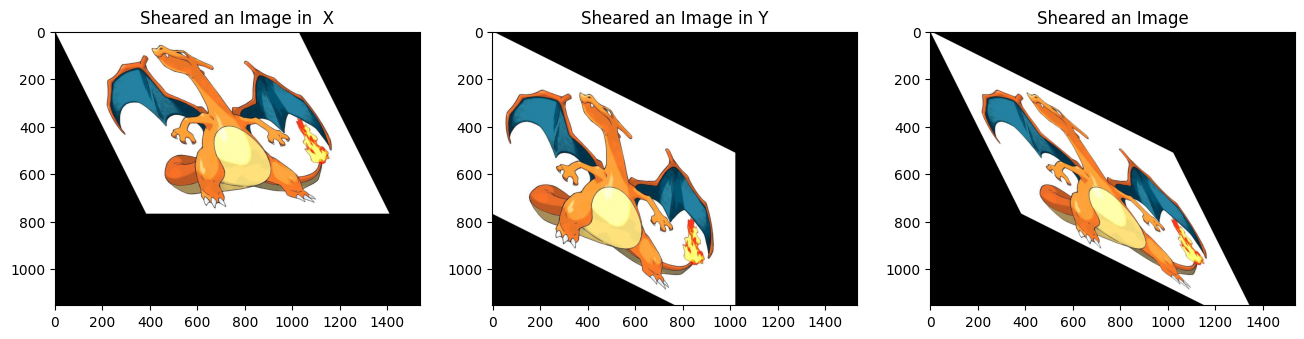

In [196]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.imshow(sheared_img_x)
plt.title("Sheared an Image in  X")

plt.subplot(1, 3, 2)
plt.imshow(sheared_img_y)
plt.title("Sheared an Image in Y")

plt.subplot(1, 3, 3)
plt.imshow(sheared_img)
plt.title("Sheared an Image")

plt.show()

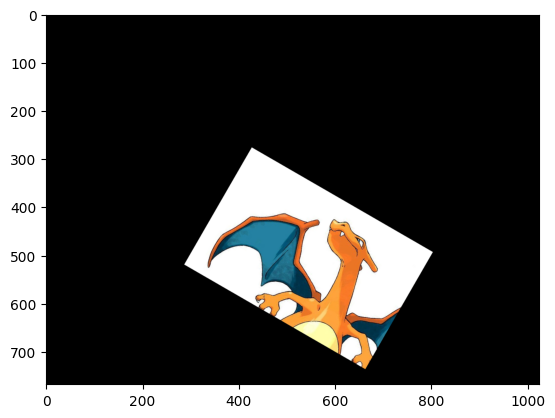

In [213]:
# Translate -> Rotate

translate_image = translating_image(image, 300, 300)
rotate_image = rotating_matrix(translate_image, 30)

plt.imshow(rotate_image)

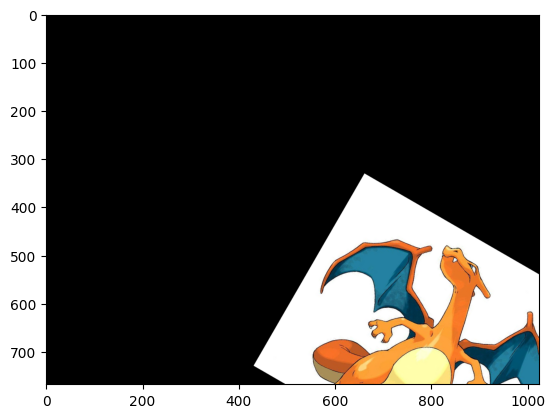

In [214]:
# Rotate -> Translate

rotate_image = rotating_matrix(image, 30)
translate_image = translating_image(rotate_image, 300, 300)

plt.imshow(translate_image)